In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_ytest = pd.read_csv('gender_submission.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("number of people and features",df_train.shape)
print("features ",df_train.columns)

number of people and features (891, 12)
features  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
X_train = df_train[["Pclass","Sex","Age","SibSp","Parch"]]
X_train.dropna(inplace=True)
X_train.head()

/var/folders/23/0kf9cxz57zd2dvfgn6pd8yw80000gn/T/ipykernel_57995/4080603844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.dropna(inplace=True)


,Pclass,Sex,Age,SibSp,Parch
0,3,male,22.0,1,0
1,1,female,38.0,1,0
2,3,female,26.0,0,0
3,1,female,35.0,1,0
4,3,male,35.0,0,0


In [6]:
X_train_num = X_train.drop(["Sex"],axis=1)
X_train_num.head()

,Pclass,Age,SibSp,Parch
0,3,22.0,1,0
1,1,38.0,1,0
2,3,26.0,0,0
3,1,35.0,1,0
4,3,35.0,0,0


In [7]:
X_test = df_test[["Pclass","Sex","Age","SibSp","Parch"]]
X_test.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1


In [8]:
X_test_num = X_test.drop(["Sex"],axis=1)
X_test_num.head()

,Pclass,Age,SibSp,Parch
0,3,34.5,0,0
1,3,47.0,1,0
2,2,62.0,0,0
3,3,27.0,0,0
4,3,22.0,1,1


In [9]:
y_train = df_train[["Survived","Pclass","Sex","Age","SibSp","Parch"]]
y_train.dropna(inplace=True)
y_train = y_train[["Survived"]]
y_train.head()

/var/folders/23/0kf9cxz57zd2dvfgn6pd8yw80000gn/T/ipykernel_57995/1928722470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.dropna(inplace=True)


,Survived
0,0
1,1
2,1
3,1
4,0


In [10]:
#drop unnecessary feautures
X_test = df_test[["Pclass","Sex","Age","SibSp","Parch"]]
X_test.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1


In [11]:
y_test = df_ytest[["Survived"]]
y_test.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [12]:
#PREPARING THE DATA
numerical_pipeline = Pipeline([('imputer',SimpleImputer(strategy="mean")),
                     ('std_scaler',StandardScaler()) ])
X_train_num_transformed = numerical_pipeline.fit_transform(X_train_num)
pipeline = ColumnTransformer([
                    ("numeric",numerical_pipeline,list(X_train_num)),
                    ("categorical",OneHotEncoder(),["Sex"])])
X_train_prepared = pipeline.fit_transform(X_train)

numerical_pipeline = Pipeline([('imputer',SimpleImputer(strategy="mean")),
                     ('std_scaler',StandardScaler()) ])
X_train_num_transformed = numerical_pipeline.fit_transform(X_test_num)
pipeline = ColumnTransformer([
                    ("numeric",numerical_pipeline,list(X_test_num)),
                    ("categorical",OneHotEncoder(),["Sex"])])
X_test_prepared = pipeline.fit_transform(X_test)


In [13]:
#MODEL 1: LINEAR REGRESSION
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared,y_train)
y_lr_predicted = lin_reg.predict(X_test_prepared).round()
accuracy_score(y_test,y_lr_predicted)


0.9354066985645934

In [14]:
#MODEL 2: DECISION TREE REGRESSOR
dec_tree_reg = DecisionTreeRegressor()
dec_tree_reg.fit(X_train_prepared,y_train)
y_dtr_predicted = lin_reg.predict(X_test_prepared).round()
accuracy_score(y_test,y_dtr_predicted)


0.9354066985645934

In [15]:
#MODEL 3: RANDOM FOREST REGRESSOR
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_prepared,y_train.values.ravel())
y_rf_predicted = rf_reg.predict(X_test_prepared).round()
accuracy_score(y_test,y_rf_predicted)

0.7942583732057417

In [16]:
#MODEL 4: SUPPORT VECTOR MACHINE REGRESSOR
svr = SVR()
svr.fit(X_train_prepared,y_train.values.ravel())
y_svr_predicted = svr.predict(X_test_prepared).round()
accuracy_score(y_test,y_svr_predicted)

0.8827751196172249

In [17]:
#MODEL 5: K NEIGHBORS CLASSIFIER (for categorical variables)
knnc = KNeighborsClassifier(n_neighbors=4,weights="uniform")
knnc.fit(X_train_prepared,y_train.values.ravel())
y_knnc_predicted = knnc.predict(X_test_prepared).round()
accuracy_score(y_test,y_knnc_predicted)

0.8229665071770335

In [18]:
df_predicted_lr = X_test.copy()
df_predicted_lr["Survived"] = y_lr_predicted.round().astype(int)
df_predicted_lr.head(20)

,Pclass,Sex,Age,SibSp,Parch,Survived
0,3,male,34.5,0,0,0
1,3,female,47.0,1,0,0
2,2,male,62.0,0,0,0
3,3,male,27.0,0,0,0
4,3,female,22.0,1,1,1
5,3,male,14.0,0,0,0
6,3,female,30.0,0,0,1
7,2,male,26.0,1,1,0
8,3,female,18.0,0,0,1
9,3,male,21.0,2,0,0


In [19]:
print("Predictions with Linear Regression with accuracy score %.2f" % accuracy_score(y_test,y_lr_predicted))
print("Predicted survival info")
print(df_predicted_lr[ df_predicted_lr["Survived"]==1].value_counts())
print("Given survival info")
df_train = df_train[["Pclass","Sex","Age","SibSp","Parch","Survived"]]
print(df_train[df_train["Survived"]==1].value_counts())

Predictions with Linear Regression with accuracy score 0.94
Predicted survival info
Pclass  Sex     Age   SibSp  Parch  Survived
3       female  18.0  0      0      1           4
                22.0  0      0      1           3
                23.0  0      0      1           3
1       female  18.0  1      0      1           2
                33.0  0      0      1           2
                                               ..
                63.0  1      0      1           1
                60.0  1      4      1           1
                      0      0      1           1
                59.0  2      0      1           1
3       female  38.0  0      0      1           1
Length: 111, dtype: int64
Given survival info
Pclass  Sex     Age   SibSp  Parch  Survived
1       female  30.0  0      0      1           5
3       male    32.0  0      0      1           5
1       female  35.0  1      0      1           4
                24.0  0      0      1           4
3       female  22.0  0      0

Text(0.5, 1.0, 'Predicted')

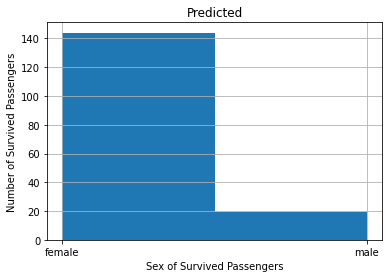

In [20]:
df_predicted_lr[df_predicted_lr["Survived"]==1].Sex.hist(bins=2)
plt.xlabel("Sex of Survived Passengers")
plt.ylabel("Number of Survived Passengers")
plt.title("Predicted")

Text(0.5, 1.0, 'Actual')

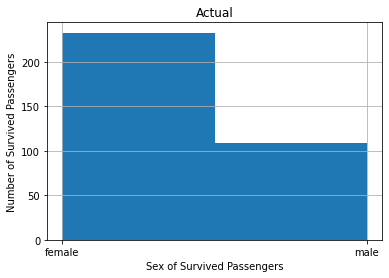

In [21]:
df_train[df_train["Survived"]==1].Sex.hist(bins=2)
plt.xlabel("Sex of Survived Passengers")
plt.ylabel("Number of Survived Passengers")
plt.title("Actual")

Text(0.5, 1.0, 'Predicted')

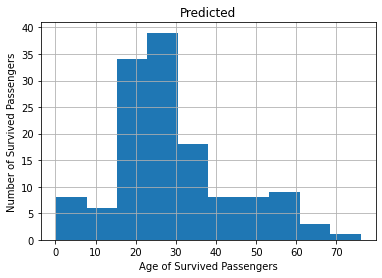

In [22]:
df_predicted_lr[df_predicted_lr["Survived"]==1].Age.hist()
plt.xlabel("Age of Survived Passengers")
plt.ylabel("Number of Survived Passengers")
plt.title("Predicted")

Text(0.5, 1.0, 'Actual')

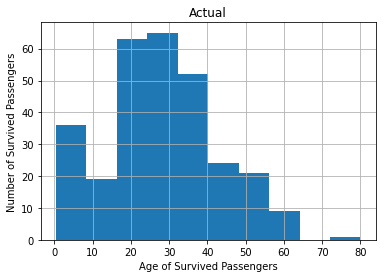

In [23]:
df_train[df_train["Survived"]==1].Age.hist()
plt.xlabel("Age of Survived Passengers")
plt.ylabel("Number of Survived Passengers")
plt.title("Actual")

Text(0.5, 1.0, 'Predicted')

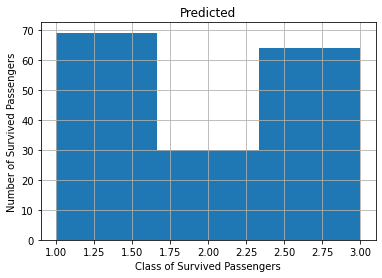

In [26]:
df_predicted_lr[df_predicted_lr["Survived"]==1].Pclass.hist(bins=3)
plt.xlabel("Class of Survived Passengers")
plt.ylabel("Number of Survived Passengers")
plt.title("Predicted")

Text(0.5, 1.0, 'Actual')

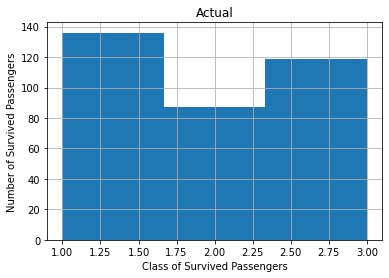

In [27]:
df_train[df_train["Survived"]==1].Pclass.hist(bins=3)
plt.xlabel("Class of Survived Passengers")
plt.ylabel("Number of Survived Passengers")
plt.title("Actual")